In [7]:
import os
import cv2
import pickle
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

# Normalize the input images
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

# Convert the labels to one-hot encoding
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)


In [11]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Assume X_train is a tensor of shape (num_samples, height, width, channels)
input_shape = X_train.shape[1:]

model = keras.Sequential([
    keras.Input(shape=input_shape),
    
    layers.Conv2D(filters=96, kernel_size=(11,11), strides=(1,1), padding='valid'),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    layers.BatchNormalization(),
    
    layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), padding='same'),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    layers.BatchNormalization(),
    
    layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'),
    layers.Activation('relu'),
    layers.BatchNormalization(),
    
    layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'),
    layers.Activation('relu'),
    layers.BatchNormalization(),
    
    layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    layers.BatchNormalization(),
    
    layers.Flatten(),
    
    layers.Dense(units=4096),
    layers.Activation('relu'),
    layers.Dropout(0.5),
    layers.BatchNormalization(),
    
    layers.Dense(units=4096),
    layers.Activation('relu'),
    layers.Dropout(0.5),
    layers.BatchNormalization(),

    layers.Dense(10),
    layers.Activation('softmax')
])

# Print the model summary
model.summary()





Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 18, 18, 96)        11712     
                                                                 
 activation_32 (Activation)  (None, 18, 18, 96)        0         
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 9, 9, 96)         0         
 g2D)                                                            
                                                                 
 batch_normalization_28 (Bat  (None, 9, 9, 96)         384       
 chNormalization)                                                
                                                                 
 conv2d_21 (Conv2D)          (None, 9, 9, 256)         614656    
                                                                 
 activation_33 (Activation)  (None, 9, 9, 256)        

In [12]:
# Compile the model using each optimizer
adam_optimizer = keras.optimizers.Adam(learning_rate=0.0001)
rmsprop_optimizer = keras.optimizers.RMSprop(learning_rate=0.0001)
sgd_optimizer = keras.optimizers.SGD(learning_rate=0.0001)

optimizers = [adam_optimizer, rmsprop_optimizer, sgd_optimizer]

model.compile(loss="categorical_crossentropy", optimizer=adam_optimizer, metrics=["accuracy"])

# Train the model and store the history for each optimizer
histories = []
for optimizer in optimizers:
    print(f"Training model with optimizer: {optimizer}")
    model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    history = model.fit(X_train, y_train, batch_size=128, epochs=10, validation_data=(X_test, y_test))
    histories.append(history)




Training model with optimizer: <keras.optimizers.optimizer_v2.adam.Adam object at 0x000001DD34E18400>
Epoch 1/10
469/469 [==============================] - 530s 1s/step - loss: 0.1867 - accuracy: 0.9430 - val_loss: 0.6728 - val_accuracy: 0.8018
Epoch 2/10
469/469 [==============================] - 617s 1s/step - loss: 0.0615 - accuracy: 0.9819 - val_loss: 0.0784 - val_accuracy: 0.9783
Epoch 3/10
469/469 [==============================] - 539s 1s/step - loss: 0.0413 - accuracy: 0.9877 - val_loss: 0.0675 - val_accuracy: 0.9813
Epoch 4/10
469/469 [==============================] - 510s 1s/step - loss: 0.0267 - accuracy: 0.9917 - val_loss: 0.0604 - val_accuracy: 0.9840
Epoch 5/10
469/469 [==============================] - 530s 1s/step - loss: 0.0265 - accuracy: 0.9917 - val_loss: 0.0694 - val_accuracy: 0.9869
Epoch 6/10
469/469 [==============================] - 524s 1s/step - loss: 0.0227 - accuracy: 0.9930 - val_loss: 0.0527 - val_accuracy: 0.9873
Epoch 7/10
469/469 [====================

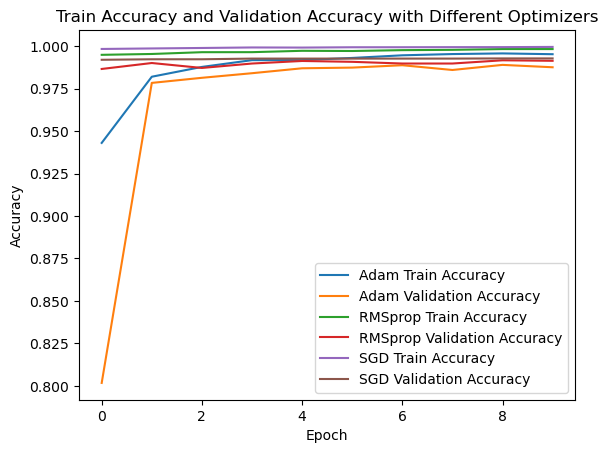

In [14]:
import matplotlib.pyplot as plt

# Plot the train accuracy and validation accuracy for each optimizer
for i, history in enumerate(histories):
    optimizer_name = optimizers[i].__class__.__name__
    plt.plot(history.history['accuracy'], label=f'{optimizer_name} Train Accuracy')
    plt.plot(history.history['val_accuracy'], label=f'{optimizer_name} Validation Accuracy')

plt.title('Train Accuracy and Validation Accuracy with Different Optimizers')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
